# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [2]:
df_aapl = yf.download('AAPL', start='2018-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600
2018-01-03,40.419785,40.964255,40.356422,40.490191,118071600
2018-01-04,40.607536,40.710798,40.384586,40.492539,89738400
2018-01-05,41.069870,41.156702,40.612235,40.703762,94640000
2018-01-08,40.917313,41.213014,40.818742,40.917313,82271200


## Generate Trading Signals

In [3]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703


In [4]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1


In [5]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
print(buy_markers, sell_markers)

Date
2018-10-16    1.0
2019-05-06    1.0
2022-09-26    1.0
2023-03-22    1.0
2024-06-13    1.0
Name: Signal, dtype: float64 Date
2018-12-21   -1.0
2022-06-03   -1.0
2022-10-07   -1.0
2024-03-14   -1.0
2025-04-07   -1.0
Name: Signal, dtype: float64


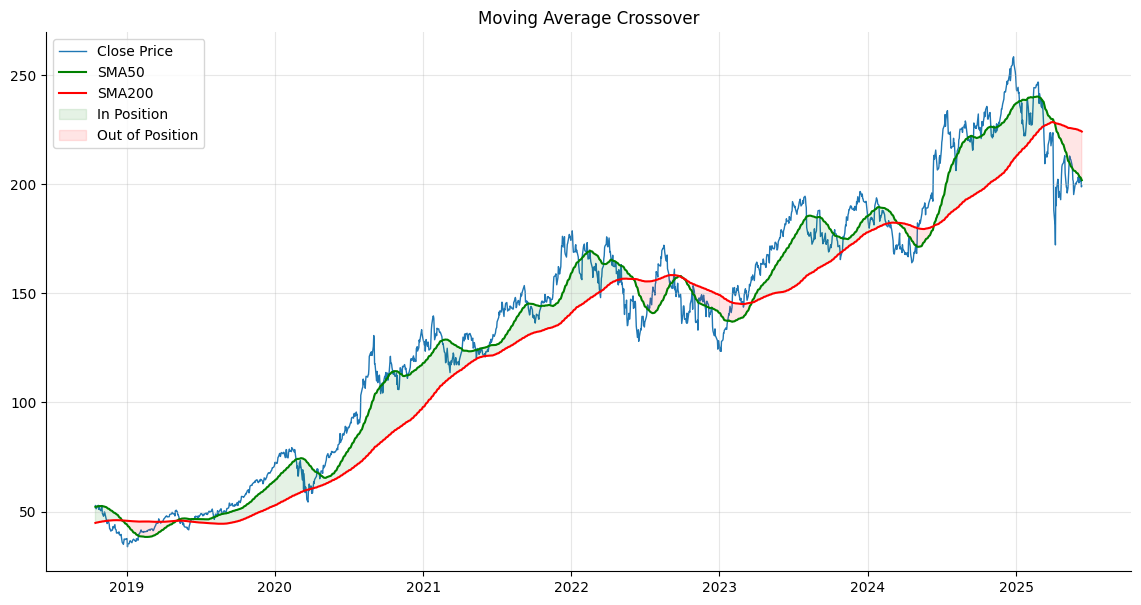

In [6]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                    color='Green',
                    alpha=0.1,
                    label="In Position")

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                    color='Red',
                    alpha=0.1,
                    label="Out of Position")          

ax.legend(loc='upper left')

plt.show;

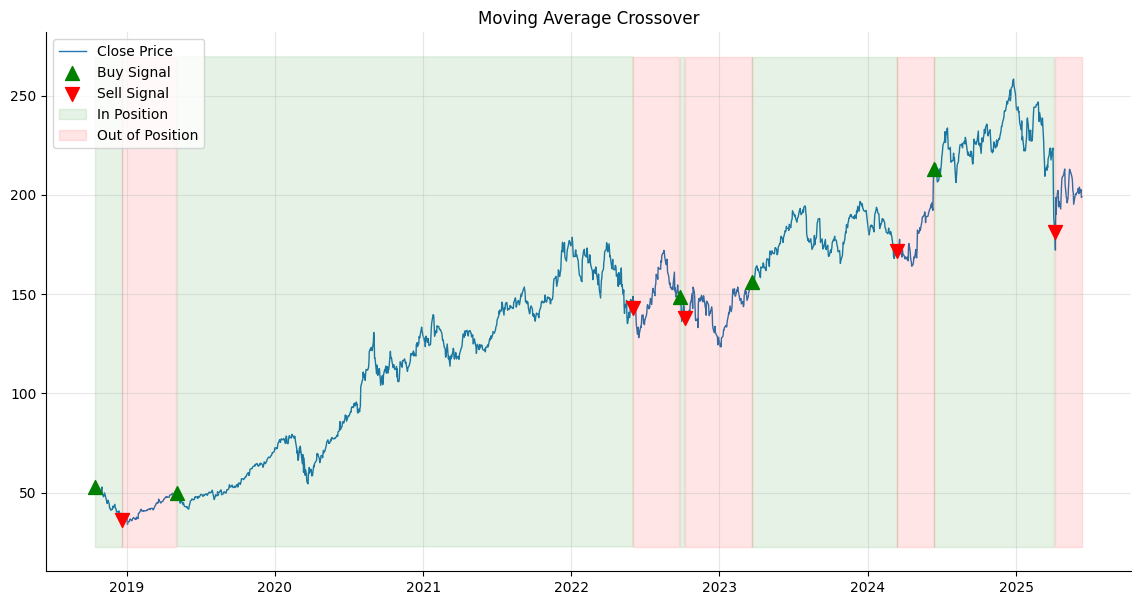

In [7]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

## Calculate Returns

In [8]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1,1.0
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1,1.0
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0


In [9]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1,1.0,-0.004321
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1,1.0,-0.023374
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1,1.0,0.006110
...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056


In [10]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000


In [11]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374,0.972406
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000,3.866957
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000,3.820118
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000,3.843253


In [12]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2018-10-16,52.733967,52.933369,51.454489,51.969603,116736000,52.139060,44.800210,1,NaN,NaN,NaN,NaN,NaN
2018-10-17,52.506100,52.850300,52.066945,52.769592,91541600,52.209343,44.860606,1,1.0,-0.004321,-0.004321,0.995679,0.995679
2018-10-18,51.278835,52.161889,50.561947,51.715614,130325200,52.254418,44.914901,1,1.0,-0.023374,-0.023374,0.972406,0.972406
2018-10-19,52.059814,52.522705,51.613539,51.763089,132314800,52.307401,44.972163,1,1.0,0.015230,0.015230,0.987216,0.987216
2018-10-22,52.377899,53.021201,51.971981,52.173752,115168400,52.369690,45.028703,1,1.0,0.006110,0.006110,0.993248,0.993248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627017,0,0.0,0.016398,0.000000,3.866957,1.699719
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505684,0,0.0,-0.012113,-0.000000,3.820118,1.699719
2025-06-10,202.669998,204.350006,200.570007,200.600006,54672600,202.773435,224.391000,0,0.0,0.006056,0.000000,3.843253,1.699719


## Analysis of Strategy Performance

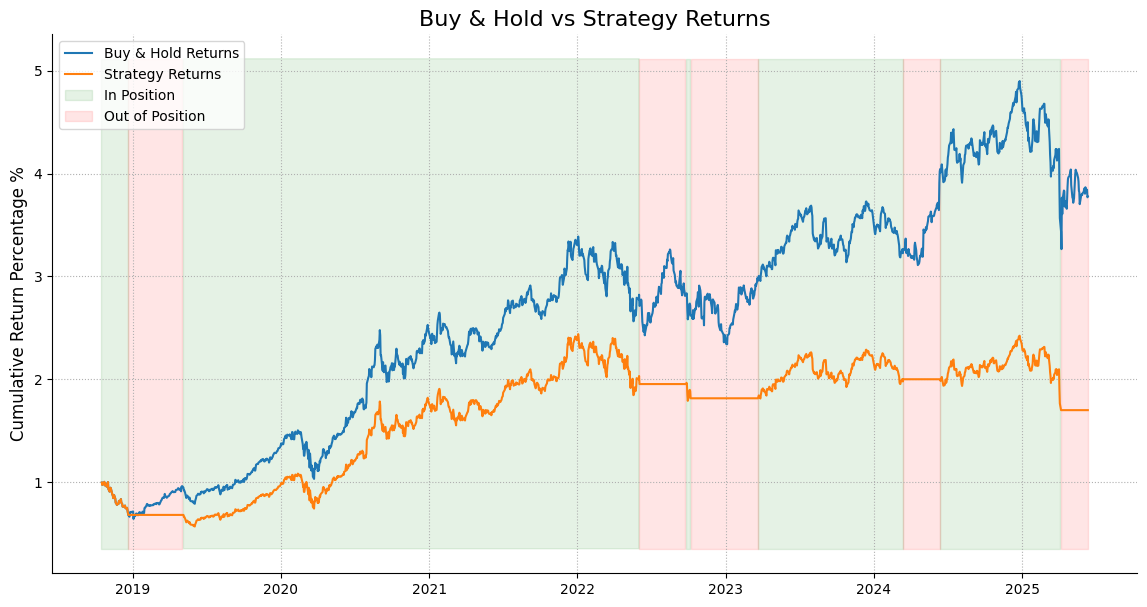

In [16]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

ax.legend(loc="upper left")

plt.show;

## Writing a function to backtest

In [34]:
from datetime import date
print(date.today(), date.today().year)

2025-06-12 2025


In [42]:
str(date.today().year - 5) + "-01-01"

'2020-01-01'

In [92]:
def backtest_ma_strategy(ticker: str = None,
                         start_date: str = str(date.today().year - 5) + "-01-01",
                         end_date: str = str(date.today()),
                         short_window: int = 50,
                         long_window: int = 200,
):
    """
    Backtest a simple moving average trading strategy.
    """

    if ticker == None:
        print('Ticker Needed')
        return

    # Download Ticker Price Data
    df = yf.download(ticker, start=start_date, end=end_date).droplevel(axis=1, level=1)
    
    # Short Signal
    df['short_ma'] = df['Close'].rolling(window=short_window).mean()
    # Long Signal
    df['long_ma'] = df['Close'].rolling(window=long_window).mean()
    # Drop rows where signals are missing due to lack of data
    df.dropna(inplace=True)

    # When the short window closes above the long window, flag a buy signal
    df['signal'] = (df['short_ma'] > df['long_ma']) * 1
    # Position the days trade based on the previous close signal
    df['position'] = df['signal'].shift(1)

    # The daily price change of the stock
    df['daily_returns'] = df['Close'].pct_change()
    # The price change of the stock, only accounting for days we are in position
    df['strategy_returns'] = df['position'] * df['daily_returns']

    # The return on investment if we had bought and held from the start date
    df['daily_cum_returns'] = (1 + df['daily_returns']).cumprod()
    # The return on investment if we had traded and held the the stock signal
    df['strategy_cum_returns'] = (1 + df['strategy_returns']).cumprod()


    return df


In [95]:
backtest_ma_strategy("AAPL")

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2020-10-15,117.550011,118.027181,115.057030,115.612108,112559200,113.858163,86.063326,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904259,118.368034,115.699757,118.105098,115393800,113.961827,86.279743,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943855,117.267619,112.632233,116.819662,120639300,114.056629,86.484888,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433777,115.865296,112.602988,113.158066,124423700,114.149774,86.694618,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810555,115.602383,113.401544,113.615786,89946000,114.295751,86.902936,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100,203.860862,224.732911,0,0.0,-0.010798,-0.000000,1.706763,1.059176
2025-06-06,203.919998,205.699997,202.050003,203.000000,46607700,203.514464,224.627018,0,0.0,0.016398,0.000000,1.734751,1.059176
2025-06-09,201.449997,206.000000,200.020004,204.389999,72862600,203.072328,224.505685,0,0.0,-0.012113,-0.000000,1.713739,1.059176


In [118]:
backtest_ma_strategy("AAPL").loc['2020-10-16': '2021-10-16']

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2020-10-16,115.904259,118.368034,115.699757,118.105098,115393800,113.961827,86.279743,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943855,117.267619,112.632233,116.819662,120639300,114.056629,86.484888,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433777,115.865296,112.602988,113.158066,124423700,114.149774,86.694618,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810555,115.602383,113.401544,113.615786,89946000,114.295751,86.902936,1,1.0,-0.005446,-0.005446,0.968188,0.968188
2020-10-22,112.719872,114.949924,111.590235,114.375366,101988000,114.349116,87.099997,1,1.0,-0.009583,-0.009583,0.958910,0.958910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11,139.965942,141.926112,138.985857,139.436703,64452200,144.412847,132.423766,1,1.0,-0.000630,-0.000630,1.190693,1.190693
2021-10-12,138.691879,140.397233,138.231238,140.377627,73035900,144.338512,132.473540,1,1.0,-0.009103,-0.009103,1.179854,1.179854
2021-10-13,138.103790,138.584022,136.427838,138.427220,78762700,144.216402,132.497352,1,1.0,-0.004240,-0.004240,1.174851,1.174851


In [126]:
(1 + backtest_ma_strategy("AAPL").loc['2020-10-16': '2021-10-16']['daily_returns']).mean() ** 252

[*********************100%***********************]  1 of 1 completed


np.float64(1.2513580734790113)

## Risk / Return

In [17]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Price,,
Daily_Ret,0.001000,0.020262
Strategy_Ret,0.000469,0.017378


In [18]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

,Return,Risk
Price,,
Daily_Ret,0.252031,0.321651
Strategy_Ret,0.118125,0.275865


## Sharpe Ratio

In [19]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
risk_free_return = 0.017

In [20]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]
ann_summary

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.252031,0.321651,0.730701
Strategy_Ret,0.118125,0.275865,0.366575


* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

## Backtesting through rolling windows

In [21]:
# We are creating windows in time of 1 year moving along month by month
window_size=252
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    windows.append(df_aapl[i:i+window_size])

In [22]:
windows[10]

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2019-08-19,50.707748,51.281477,50.630606,50.772833,97654400,48.538253,44.425743,1,1.0,0.018644,0.018644,0.961577,0.692246
2019-08-20,50.710144,51.430926,50.700503,50.835498,107537200,48.627489,44.419529,1,1.0,0.000047,0.000047,0.961622,0.692279
2019-08-21,51.259773,51.503246,51.009069,51.344147,86141600,48.717008,44.412075,1,1.0,0.010839,0.010839,0.972045,0.699782
2019-08-22,51.216385,51.693690,50.804164,51.392360,89014800,48.808637,44.421898,1,1.0,-0.000846,-0.000846,0.971222,0.699190
2019-08-23,48.849136,51.117546,48.453792,50.485957,187272000,48.853112,44.426877,1,1.0,-0.046221,-0.046221,0.926332,0.666873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,106.511765,109.537914,106.251265,109.038833,187902400,91.380585,74.622565,1,1.0,-0.029740,-0.029740,2.019794,1.454065
2020-08-12,110.051605,110.309667,107.410112,107.604873,165598000,92.010073,74.875616,1,1.0,0.033234,0.033234,2.086921,1.502390
2020-08-13,111.999237,113.004709,110.945071,111.434419,210082000,92.669862,75.135427,1,1.0,0.017697,0.017697,2.123854,1.528978


In [ ]:
backtest_results = []

for window in windows:
    summary = window[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    ann_summary = summary * (252, np.sqrt(252))
    ann_summary["Sharpe"] = (ann_summary["Return"] - risk_free_return) / ann_summary["Risk"]

    backtest_results.append([window.index[0], ann_summary["Sharpe"].iloc[0], ann_summary["Sharpe"].iloc[1]])

In [24]:
df_backtest = pd.DataFrame(backtest_results, columns=["Window Start", "Daily Sharpe", "Strategy Sharpe"])
df_backtest.set_index("Window Start", inplace=True)
df_backtest

,Daily Sharpe,Strategy Sharpe
Window Start,,
2018-10-16,0.323992,-0.980174
2018-11-14,1.190459,0.033660
2018-12-17,2.024967,1.058796
2019-01-17,3.096154,2.125524
2019-02-19,2.760260,2.049135
...,...,...
2024-01-22,0.739453,-0.305389
2024-02-21,1.335539,0.483811
2024-03-21,0.926253,0.181742


In [25]:
window

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2024-05-21,191.454636,191.832856,190.031284,190.200491,42309400,173.899904,179.519662,0,0.0,0.006857,0.0,3.630575,2.000044
2024-05-22,190.011368,191.922444,189.384311,191.375001,34648500,174.256330,179.584333,0,0.0,-0.007538,-0.0,3.603206,2.000044
2024-05-23,186.010101,190.110918,185.761265,190.091007,51005900,174.574478,179.624295,0,0.0,-0.021058,-0.0,3.527330,2.000044
2024-05-24,189.095657,189.692870,187.164685,187.941069,36294600,174.917162,179.687656,0,0.0,0.016588,0.0,3.585842,2.000044
2024-05-28,189.105606,192.101589,188.219750,190.618520,52280100,175.267600,179.752155,0,0.0,0.000053,0.0,3.586030,2.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,208.228509,225.689755,0,0.0,-0.000899,-0.0,4.006146,1.699719
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,207.628971,225.628424,0,0.0,-0.011739,-0.0,3.959118,1.699719
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,207.222529,225.576006,0,0.0,-0.009196,-0.0,3.922709,1.699719


In [ ]:
df_backtest.plot()

## Applying recency weighting to backtesting

In [ ]:
decay_rate = 0.95
weights = np.array([decay_rate**i for i in reversed(range(len(df_backtest)))])
weights

In [ ]:
df_backtest

In [ ]:
(df_backtest.mul(weights, axis=0) / np.sum(weights)).plot()

## Paramenter Optimization using a gridsearch